In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts

IMPORTING DATA

In [2]:
df=pd.read_csv('Copy of AirQualityUCI.csv')


MISSING VALUE

In [3]:
df1=df.replace(-200,0)
c=np.array(df.columns)
c1=np.array(df1.columns)
for i in range(2,len(c)):
    df[c[i]]=df[c[i]].replace(-200,df1[c[i]].mean())

CHECKING CORRELATION

<Axes: >

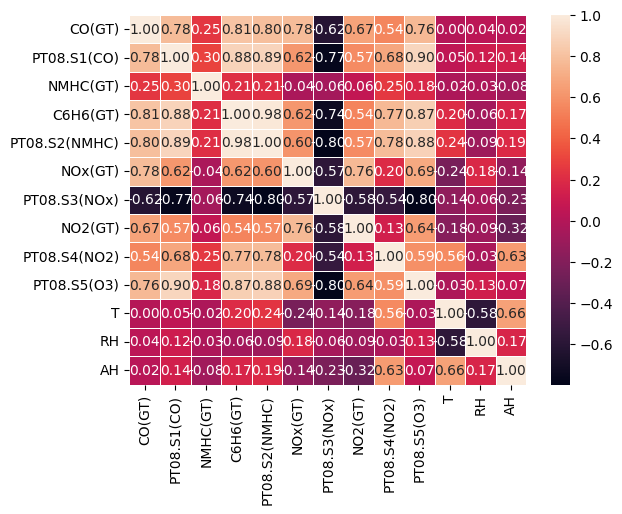

In [4]:
import seaborn as sns
dff=df.iloc[:,2:]
corr = dff.corr(method = 'pearson')

sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
#plt.show()

OUTLIERS

In [5]:
#I have deleted outliers of NOx as it has highest correlation with RH

Q1=df["NOx(GT)"].quantile(0.25)
Q2=df["NOx(GT)"].quantile(0.75)
upper=Q2+1.5*(Q2-Q1)
lower=Q2-1.5*(Q2-Q1)
df3=df[(df["NOx(GT)"]>lower)&(df["NOx(GT)"]<upper)]



DROPPING UNNECESSARY DATA

<Axes: >

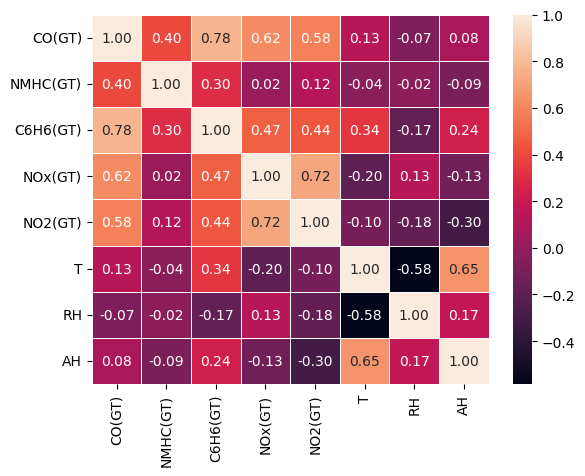

In [6]:
df3=df3.drop("Date",axis=1)
df3=df3.drop("Time",axis=1)
df3=df3.drop("PT08.S1(CO)",axis=1)
df3=df3.drop("PT08.S2(NMHC)",axis=1)
df3=df3.drop("PT08.S3(NOx)",axis=1)
df3=df3.drop("PT08.S4(NO2)",axis=1)
df3=df3.drop("PT08.S5(O3)",axis=1)
corr = df3.corr(method = 'pearson')

sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)

SPLITING DATA

In [9]:
X1=df3['CO(GT)'].to_numpy().reshape(-1,1)
X2=df3['NMHC(GT)'].to_numpy().reshape(-1,1)
X3=df3['C6H6(GT)'].to_numpy().reshape(-1,1)
X4=df3['NOx(GT)'].to_numpy().reshape(-1,1)
X5=df3['NO2(GT)'].to_numpy().reshape(-1,1)
X6=df3['T'].to_numpy().reshape(-1,1)
ones=np.ones([8393,1]).reshape(-1,1)

Y=df3['RH'].to_numpy().reshape(-1,1)
X=np.hstack([ones,X3,X4,X5,X6])
X1=np.hstack([X3,X4,X5,X6])
y_max=np.max(np.abs(Y))
x_max=np.max(np.abs(X))
x_1max=np.max(np.abs(X1))

Y_=(Y-y_max)/y_max
X_=(X-x_max)/x_max
X_1=(X1-x_1max)/x_1max

x_train1,x_test1,y_train1,y_test1=tts(X_1, Y_, test_size=0.15,  random_state =42)

x_train,x_test,y_train,y_test=tts(X_, Y_, test_size=0.15,  random_state =42)
m=y_train.shape[0]



array([[48.9],
       [47.7],
       [54. ],
       ...,
       [18.3],
       [13.5],
       [13.1]])

HYPOTHESIS as m+n*X3+o*X4+p*X5+q*X6
seeing very less correlation of CO and NMHC, not accounted them in hypothesis


In [8]:
def hypo(theta,x_train):
    return x_train.dot(theta)

COST FUNCTION

In [10]:
def cost_function(y_train,y_out):
    
    l=(y_train-y_out)**2/2
    cf=l.mean()
    return cf


GRADIENT DESCENT

In [11]:
def gd(x_train,y_train,m,theta,learning_rate):
    y_out=hypo(theta,x_train)
    dm=(1/m)*np.sum(np.multiply((y_train-y_out),-X_[0]))
    dn=(1/m)*np.sum(np.multiply((y_train-y_out),-X_[1]))
    do=(1/m)*np.sum(np.multiply((y_train-y_out),-X_[2]))
    dp=(1/m)*np.sum(np.multiply((y_train-y_out),-X_[3]))
    dq=(1/m)*np.sum(np.multiply((y_train-y_out),-X_[4]))

    theta[0]=theta[0]-learning_rate*dm
    theta[1]=theta[1]-learning_rate*dn
    theta[2]=theta[2]-learning_rate*do
    theta[3]=theta[3]-learning_rate*dp
    theta[4]=theta[4]-learning_rate*dq

    return theta

IMPLEMENT USING GD

In [12]:
theta=np.empty((5,1))

learning_rate=0.005
noche=10000

L=[]

for i in range(noche):
    theta=gd(x_train,y_train,m,theta,learning_rate)
    y_out=hypo(theta,x_train).reshape(-1,1)
    L.append(cost_function(y_train,y_out))

(0.0, 0.1)

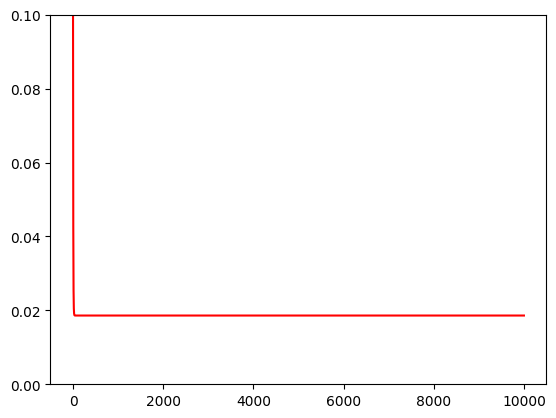

In [13]:
plt.plot(L,"r")
plt.ylim(0,.1)

USING SCIKIT

In [14]:

from sklearn.linear_model import LinearRegression as LR
regressor=LR()
regressor.fit(x_train1,y_train1)

predictions=regressor.predict(x_test1)

MEAN SQUARED ERROR

In [15]:
from sklearn.metrics import mean_squared_error
print("MSE of data by scikit :", mean_squared_error(y_test,predictions))
y_rs=x_test.dot(theta)
g=y_test.shape[0]
er=(1/g)*np.sum(np.multiply((y_test-y_rs),(y_test-y_rs)))
print("MSE of data by GD :", er)


MSE of data by scikit : 0.02064605882647789
MSE of data by GD : 0.03946085388001057


CALCULATION OF R2 SCORE

In [16]:
RSS1=mean_squared_error(y_test,predictions)*g
RSS=er*g
TSS=np.sum(np.multiply((Y-Y.mean()),(Y-Y.mean())))
R2=1-(RSS/TSS)
R2_1=1-(RSS1/TSS)
print("R2 score of GD model:",R2)
print("R2 score of SCIKIT model:",R2_1)


R2 score of GD model: 0.9999796189689623
R2 score of SCIKIT model: 0.9999893365722133
